In [59]:
# Import Modules
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import scipy as sp
import seaborn as sns
from PIL import Image
from plotly.subplots import make_subplots
from scipy import stats
warnings.filterwarnings('ignore')

In [60]:
# Read FIFA 19 dataset and show info and describe columns from it.
df = pd.read_csv("../Datasets/data.csv", index_col="Unnamed: 0")
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [61]:
# get column names.
col = df.columns
print(col)

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [62]:
# dimensions of data
print(df.shape)

(18207, 88)


In [63]:
# info for all dataset columns_name, dataType, null_count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [64]:
# description of data min, max, mean, std values for all columns
df.describe()

ID           Age       Overall     Potential       Special  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   1597.809908   
std     29965.244204      4.669943      6.908930      6.136496    272.586016   
min        16.000000     16.000000     46.000000     48.000000    731.000000   
25%    200315.500000     21.000000     62.000000     67.000000   1457.000000   
50%    221759.000000     25.000000     66.000000     71.000000   1635.000000   
75%    236529.500000     28.000000     71.000000     75.000000   1787.000000   
max    246620.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              18159.000000  18159.000000  18159.000000   18147.000000   
mean                   1.113222      2.947299      2.361308      19.546096   
std                    0.394031      0.660456      0.756164      15.947765   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       8.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      49.734181  ...     48.548598     58.648274     47.281623   
std       18.364524  ...     15.704053     11.436133     19.904397   
min        5.000000  ...      5.000000      3.000000      3.000000   
25%       38.000000  ...     39.000000     51.000000     30.000000   
50%       54.000000  ...     49.000000     60.000000     53.000000   
75%       64.000000  ...     60.000000     67.000000     64.000000   
max       93.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 43 columns]

In [65]:
# count number of rows that have null value in every columns.
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [66]:
# Calculate top 10 countries sorted by most players in the game
# group data by Nationality and sort it by number of players to get most countries having players.
national_players = df[['Nationality', "ID"]].groupby(by=['Nationality'], as_index=False).count().sort_values(
    "ID", ascending=False)
national_players.rename(columns={'Nationality': "country", 'ID': 'player_count'}, inplace=True)
national_players = national_players.reset_index()
national_players = national_players.drop(["index"], axis=1)
national_players.head(10)

country  player_count
0      England          1662
1      Germany          1198
2        Spain          1072
3    Argentina           937
4       France           914
5       Brazil           827
6        Italy           702
7     Colombia           618
8        Japan           478
9  Netherlands           453

In [67]:
# Slicing first 10 rows from country player_count dataset
player_count = national_players.iloc[0:10, 1]
nation = national_players.iloc[0:10, 0]

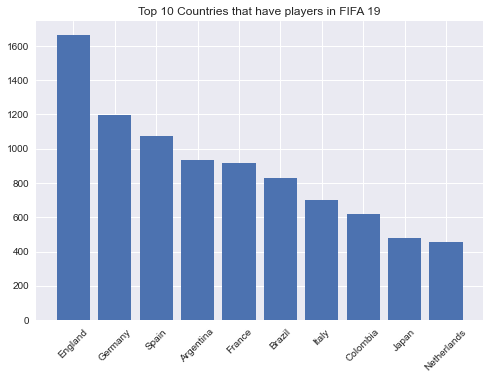

In [68]:
# select seaborn style of chart to make display easy on the eyes.
plt.style.use("seaborn")
# create bar chart
plt.bar(nation, player_count)
plt.xticks(rotation=45)
plt.title('Top 10 Countries that have players in FIFA 19')
plt.show()

In [69]:
# Show Distribution of Age for all players
# slicing Age column and group it and count no. of players that have same age for all ages.
player_ages = df[['Age', "ID"]].groupby(by=['Age'], as_index=False).count().sort_values("ID", ascending=False)
player_ages.rename(columns={'ID': 'count'}, inplace=True)
player_ages = player_ages.reset_index().drop(["index"], axis=1)
player_ages.head()

Age  count
0   21   1423
1   26   1387
2   24   1358
3   22   1340
4   23   1332

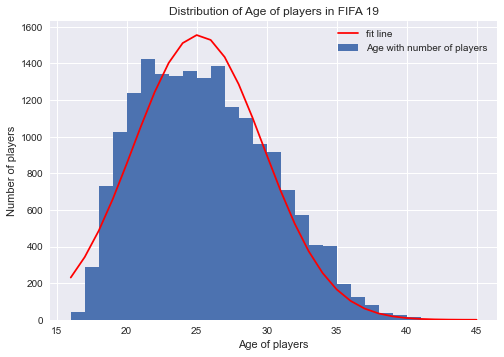

In [70]:
# display histogram of age for all players and fit a normal distribution line for it.
_, bins, _ = plt.hist(df.Age, bins=df.Age.max() - df.Age.min(), label="Age with number of players")
mu, sigma = sp.stats.norm.fit(df.Age)
best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, df.shape[0] * best_fit_line, label="fit line", color="red")

plt.title('Distribution of Age of players in FIFA 19')
plt.ylabel("Number of players")
plt.xlabel("Age of players")
plt.legend()
plt.show()

In [71]:
# Preferred foot analysis.
# count number of left and right foot preferred players
preferred_foot = df.groupby("Preferred Foot")["Preferred Foot"].count()
print(preferred_foot)

Preferred Foot
Left      4211
Right    13948
Name: Preferred Foot, dtype: int64


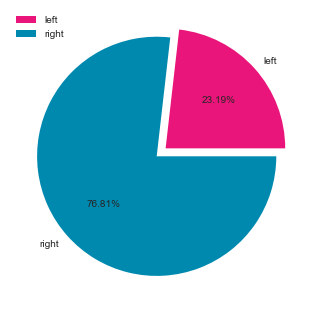

In [72]:
# plot pie chart to display the percentage for the preferred foot
plt.pie(preferred_foot, labels=["left", "right"], explode=[0.1, 0], autopct='%1.2f%%', colors=["#ea157a", "#0089af"])
plt.legend()
plt.show()

In [73]:
# Show positions with the most number of players
# count number of players for every position in playground that have players and sort it.
player_position = df[["Position", "ID"]].groupby(by=['Position'], as_index=False).count().sort_values("ID",
                                                                                                      ascending=False)
player_position.rename(columns={'ID': 'count'}, inplace=True)
player_position = player_position.reset_index().drop(["index"], axis=1)
player_position.head()

Position  count
0       ST   2152
1       GK   2025
2       CB   1778
3       CM   1394
4       LB   1322

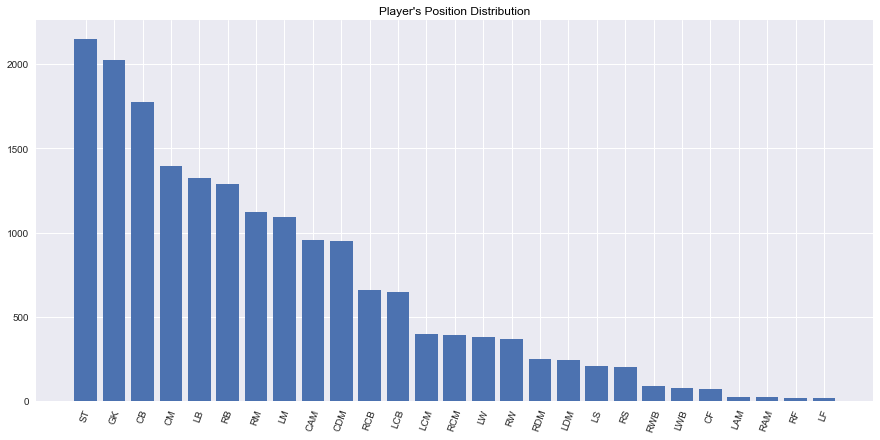

In [74]:
# plot bar chart to display the number of players for every position.
plt.figure(figsize=(15, 7))
plt.bar(player_position["Position"], player_position["count"])
plt.xticks(rotation=70)
plt.title("Player's Position Distribution", color="black")
plt.show()

In [75]:
# Top 10 players for ST, GK, LW, RF Position

ST_position = df[df["Position"] == "ST"].sort_values("Overall", ascending=False)[["Name", "Overall"]]
ST_position = ST_position.iloc[:10, :]

GK_position = df[df["Position"] == "GK"].sort_values("Overall", ascending=False)[["Name", "Overall"]]
GK_position = GK_position.iloc[:10, :]

LW_position = df[df["Position"] == "LW"].sort_values("Overall", ascending=False)[["Name", "Overall"]]
LW_position = LW_position.iloc[:10, :]

RF_position = df[df["Position"] == "RF"].sort_values("Overall", ascending=False)[["Name", "Overall"]]
RF_position = RF_position.iloc[:10, :]

In [76]:
# function to plot bar chart for top 10 players in selected positions.
def draw(df, color, position, ax):
    plt.style.use('tableau-colorblind10')
    sns.barplot(df["Name"], df["Overall"], color=color, ax=ax).set_title("Top 10 " + position + " players",
                                                                         fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

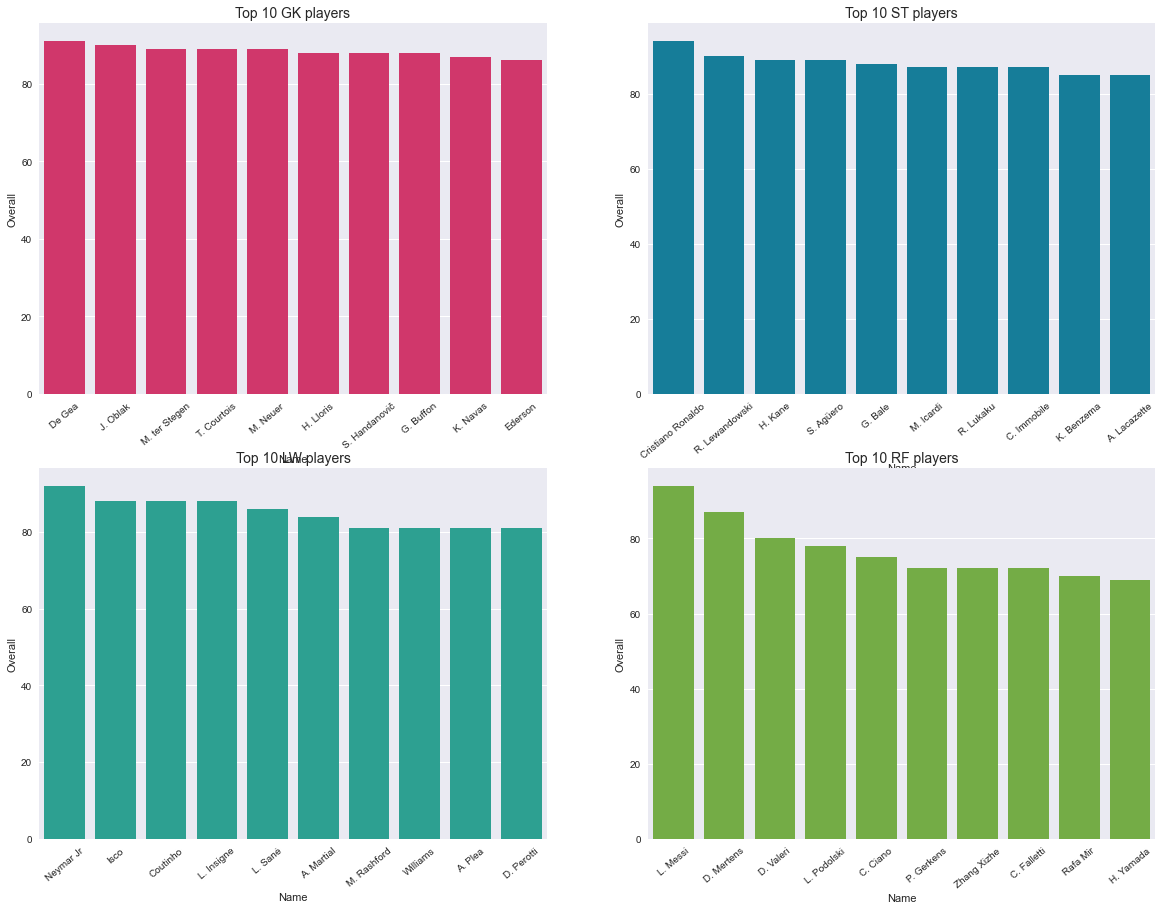

In [77]:
# plot 4 figures that display Top 10 players in ST, GK, LW, RF positions.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 15])

draw(GK_position, "#e91e63", "GK", axes[0, 0])
draw(ST_position, "#0089af", "ST", axes[0, 1])
draw(LW_position, "#1ab39f", "LW", axes[1, 0])
draw(RF_position, "#72bd35", "RF", axes[1, 1])
plt.show()

In [78]:
# Distribution of all player's value and calculate The average value of players.
# function that converts value column of players to numeric.
def getValue(df):
    new = []
    for i in df:
        i = i.strip("€")
        if "K" in i:
            i = i.strip("K")
            new.append(float(i) * 1000)
        elif "M" in i:
            i = i.strip("M")
            new.append(float(i) * (10 ** 6))
        else:
            new.append(0.0)

    return new

In [79]:
# convert value columns to numeric and calculate the average value.
lis = getValue(df.Value.values)
print("The average value of players in the world = ", round(np.average(np.array(lis)) / 10 ** 6, 2), "M")

The average value of players in the world =  2.41 M


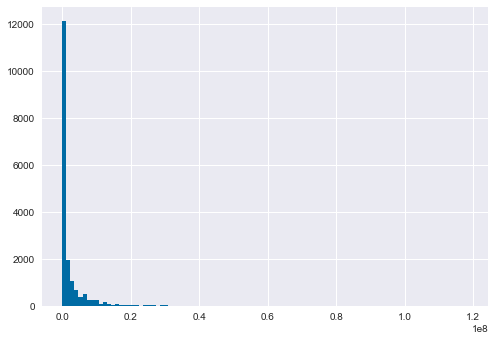

In [80]:
# plot histogram of values to show distribution of it.
plt.hist(lis, bins=100)
plt.show()

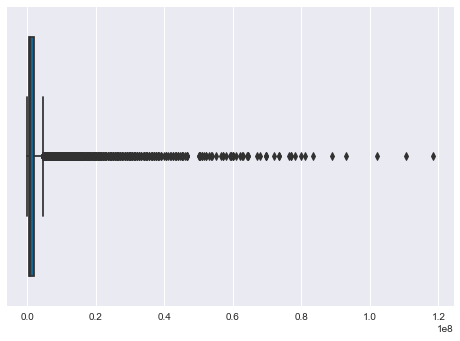

In [81]:
sns.boxplot(x=getValue(df.Value.values))
plt.show()

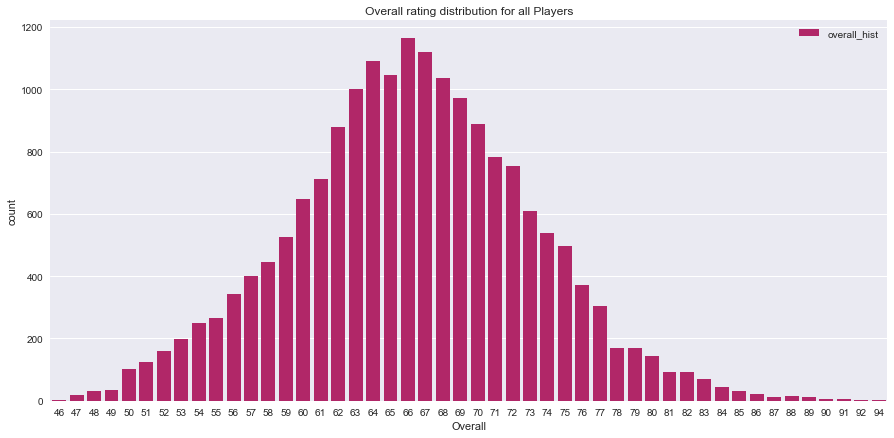

In [82]:
# Overall rating distribution and most fit line for it.
# plot the distribution of overall rating.
plt.figure(figsize=(15, 7))
sns.countplot(df.Overall, label="overall_hist", color="#c81067")
plt.title("Overall rating distribution for all Players")
plt.legend()
plt.show()

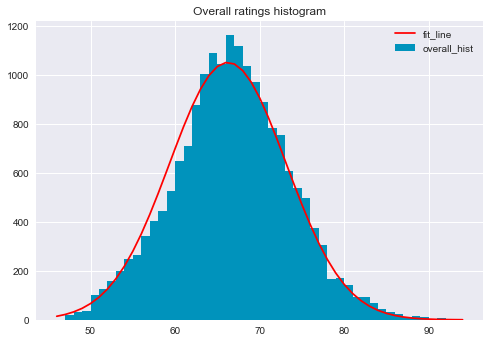

In [83]:
# plot the distribution of overall rating and get most fit line for it.
_, bins, _ = plt.hist(df.Overall, bins=(df.Overall.max() - df.Overall.min()), label="overall_hist", color="#0093bc")
mu, sigma = sp.stats.norm.fit(df.Overall)
best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, df.shape[0] * best_fit_line, label="fit_line", color="red")
plt.title("Overall ratings histogram")
plt.legend()
plt.show()

In [84]:
# Make Analysis for Real Madrid Club.
# select Real Madrid player from data
real_Madrid_players = df[df.Club == "Real Madrid"]
real_Madrid_players = real_Madrid_players[["Name", "Age", "Nationality", "Value", "Release Clause", "Overall"]]
real_Madrid_players.rename(columns={'Release Clause': 'Release'}, inplace=True)

In [85]:
# convert value column to numeric.
real_Madrid_players.Release = getValue(real_Madrid_players.Release)

In [86]:
# sort them by Release column.
real_Madrid_players.sort_values("Release", inplace=True, ascending=False)
real_Madrid_players = real_Madrid_players.reset_index()
real_Madrid_players.drop("index", axis=1, inplace=True)
real_Madrid_players.head(10)

Name  Age Nationality   Value      Release  Overall
0       T. Kroos   28     Germany  €76.5M  156800000.0       90
1           Isco   26       Spain  €73.5M  156200000.0       88
2      L. Modrić   32     Croatia    €67M  137400000.0       91
3       Casemiro   26      Brazil  €59.5M  126400000.0       88
4        G. Bale   28       Wales    €60M  123000000.0       88
5  Marco Asensio   22       Spain    €54M  121500000.0       85
6    T. Courtois   26     Belgium  €53.5M  113700000.0       89
7      R. Varane   25      France    €50M  106300000.0       86
8   Sergio Ramos   32       Spain    €51M  104600000.0       91
9        Marcelo   30      Brazil    €43M   88200000.0       88

In [87]:
print("Overall mean value for Real Madrid Team = ", round(real_Madrid_players.Overall.mean()), "%")

print("Release Corr. Overall= ", round(real_Madrid_players.Release.corr(real_Madrid_players.Overall), 2))

Overall mean value for Real Madrid Team =  78 %
Release Corr. Overall=  0.89


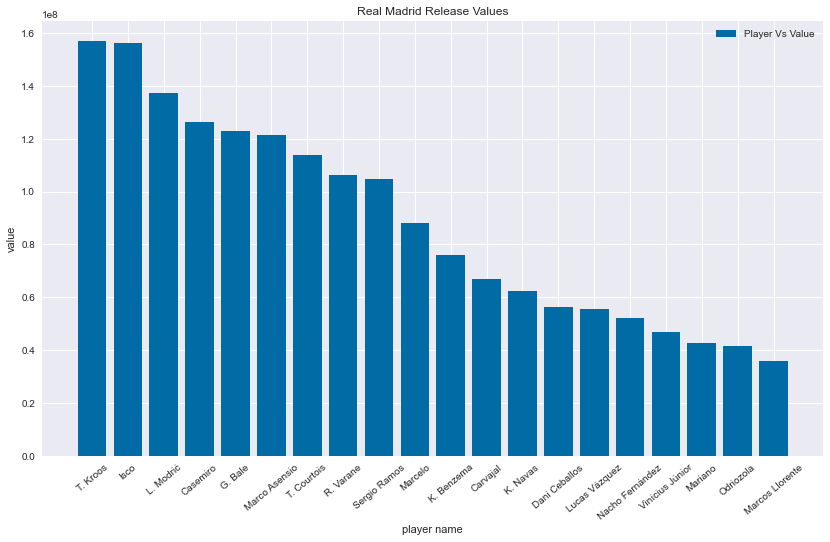

In [88]:
# plot chart for Release Values.
plt.figure(figsize=(14, 8))
plt.bar(real_Madrid_players.Name[:20], real_Madrid_players.Release[:20], width=0.8,
        label="Player Vs Value")
plt.title("Real Madrid Release Values")
plt.xticks(rotation=40)
plt.xlabel("player name")
plt.ylabel("value")
plt.legend()
plt.show()

In [89]:
# Calculate the relation between weight and height for all players(corr. and distribution)
# function that convert weight to numeric.
def get_weight(weight):
    new = []
    for i in weight:
        if "lbs" in str(i):
            new.append(i.strip("lbs"))
    return new

In [90]:
# function that convert height to numeric.
def get_height(height):
    new = []
    for i in height:
        if "'" in str(i):
            new.append(i.replace("'", "."))
    return new

In [91]:
# drop nan values form weight and height columns and convert it to numeric.
weight_height = df[["Weight", "Height"]].dropna(how="any")
weight_height.Weight = get_weight(list(weight_height.Weight.values))
weight_height.Height = get_height(list(weight_height.Height.values))

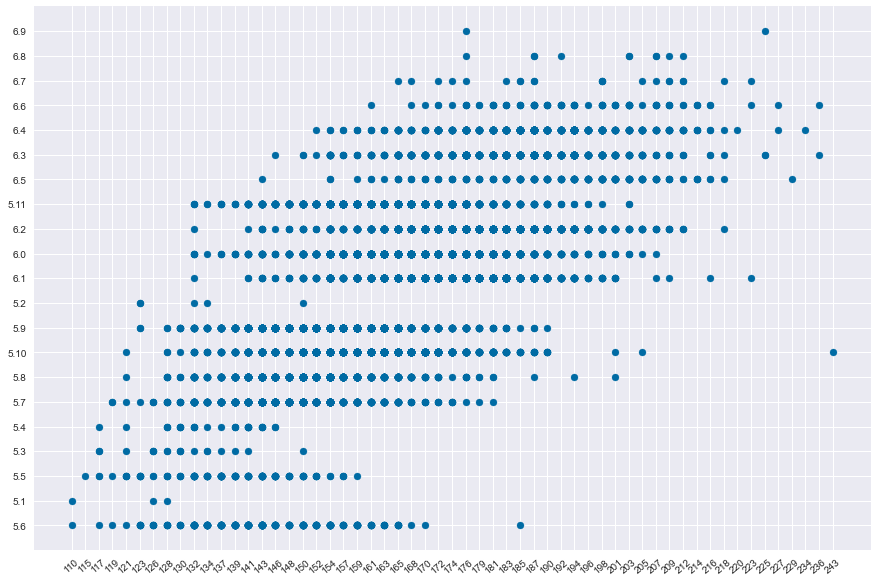

correlation between Weight and Height of players= 0.45


In [92]:
# plot scatter for  weight column.
weight_height.sort_values("Weight", ascending=True, inplace=True)
plt.figure(figsize=(15, 10))
plt.scatter(weight_height.Weight, weight_height.Height)
plt.xticks(rotation=40)
plt.show()

weight_height.Weight = weight_height.Weight.astype("float64")
weight_height.Height = weight_height.Height.astype("float64")
print("correlation between Weight and Height of players=", round(weight_height.Weight.corr(weight_height.Height), 2))

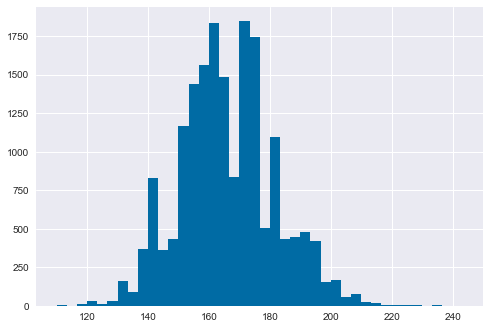

In [93]:
# plot the distribution of weight.
plt.hist(weight_height.Weight, bins=40)
plt.show()

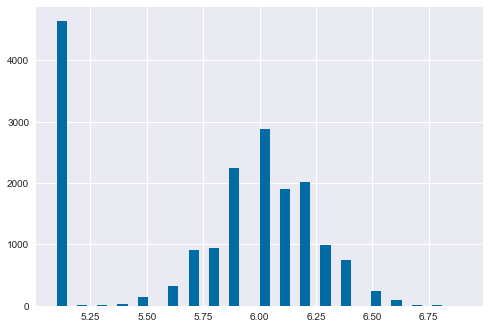

(18159,)


In [94]:
# plot distribution of Height columns.
plt.hist(weight_height.Height, bins=40)
plt.show()
stats.mode(weight_height.Height)
print(weight_height.Height.shape)

In [95]:
# Top 10 expensive teams in the world
# drop nan from needed columns and group by Clubs and sort it by sum op player values.
club_value_df = df[["Club", "Release Clause"]].dropna(how="any")
club_value_df.columns = ["club", "value"]
club_value_df.value = getValue(club_value_df.value)
club_value_df = club_value_df.groupby(by=['club'], as_index=False).sum().sort_values(by="value", ascending=False)
club_value_df.reset_index().drop("index", axis=1).head(10)

club         value
0          Real Madrid  1.857688e+09
1         FC Barcelona  1.813000e+09
2      Manchester City  1.512907e+09
3      Atlético Madrid  1.375649e+09
4  Paris Saint-Germain  1.216266e+09
5             Juventus  1.193600e+09
6    Tottenham Hotspur  1.192323e+09
7            Liverpool  1.155832e+09
8    Manchester United  1.142500e+09
9              Chelsea  1.092814e+09

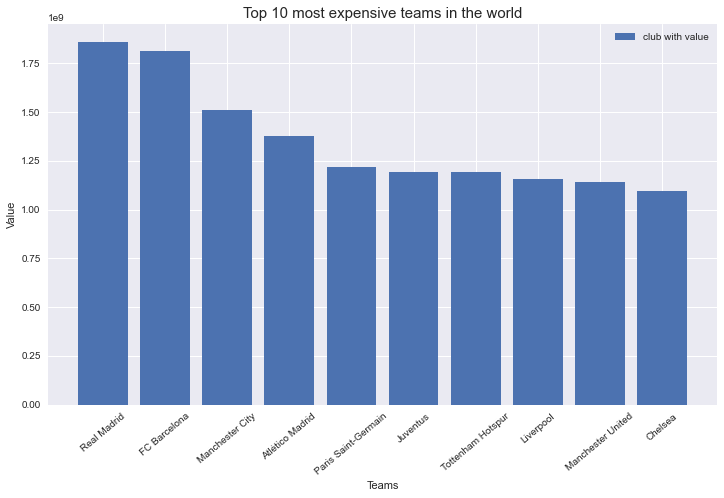

In [96]:
# plot most 10 team have expensive players.
plt.figure(figsize=(12, 7))
plt.style.use("seaborn")
plt.bar(club_value_df.club[:10], club_value_df.value[:10], label="club with value")
plt.title("Top 10 most expensive teams in the world", fontsize=15)
plt.xlabel("Teams")
plt.ylabel("Value")
plt.xticks(rotation=40)
plt.legend()
plt.show()

In [97]:
# Calculate ATTRIBUTE DETAILS for any player you want.
# attribute dictionary key attribute and values skills columns for every attribute.
attribute_dict = {"shooting": ["Positioning", "Finishing", "ShotPower", "LongShots", "Volleys", "Penalties"],
                  "passing": ["Vision", "Crossing", "FKAccuracy", "ShortPassing", "LongPassing", "Curve"],
                  "dribbling": ["Agility", "Balance", "Reactions", "BallControl", "Dribbling", "Composure"],
                  "defending": ["Interceptions", "HeadingAccuracy", "Marking", "StandingTackle", "SlidingTackle"],
                  "physical": ["Jumping", "Stamina", "Strength", "Aggression"]}

In [98]:
# function that calculate attribute for any player: need using player index
def calculate_attribute(dataframe, player_index):
    allcols = []

    for i in attribute_dict.values():
        allcols.extend(i)

    player_observation = dataframe.loc[player_index, allcols].astype("int64")
    player_skills = []

    for i in attribute_dict.keys():
        lis = attribute_dict.get(i)
        player_skills.append(int(sum(player_observation[lis]) / len(player_observation[lis])))

    return {i.upper() + ": " + str(j) + "%": j for i, j in zip(attribute_dict.keys(), player_skills)}


In [99]:
# function get skills values for any attribute.
def get_attributes_values(attribute, observation):
    return observation.loc[attribute_dict.get(attribute)].astype("int64")

In [100]:
# function that plot player attribute: need index of player skills.
def plot_player_attribute(player_index, observation, skills):
    colors = ['#03a309', "#a3037e", "#fd3689", "#ded118", "#474bc9"]
    go.Figure()
    fig = make_subplots(rows=1, cols=5)
    # create skills bar chart
    for key, skill_name, color_i, column in zip(attribute_dict.keys(), skills, colors, range(1, 6)):
        values = get_attributes_values(key, observation)
        fig.add_trace(go.Bar(x=values, y=attribute_dict.get(key), name=skill_name,
                             marker=go.bar.Marker(color=color_i, line=dict(color="#454545", width=1)), orientation="h",
                             width=0.5, text=values, textposition='auto'), row=1, col=column)

    # read image
    img = Image.open("../faces/" + str(player_index) + ".png")
    # Add image
    fig.add_layout_image(dict(source=img, xref="paper", yref="paper",
                              x=1, y=1.5, sizex=0.5, sizey=0.5, xanchor="right", yanchor="top"))
    # update layout properties
    fig.update_layout(autosize=False, height=300, width=2300, bargap=0.5, bargroupgap=0.3, barmode="overlay",
                      hovermode="x", margin=dict(r=0, l=0, b=0, t=100),
                      title=(
                          {'text': observation["Name"] + " ATTRIBUTE DETAILS", 'y': 0.9, 'x': 0.5, 'xanchor': 'right',
                           'yanchor': 'top'}))
    fig.update_xaxes(range=[0, 100])
    fig.show()



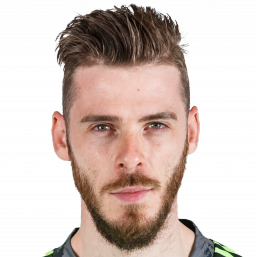


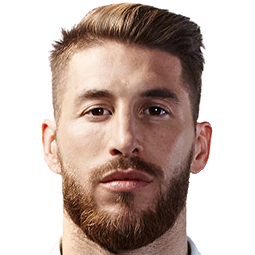


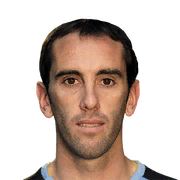


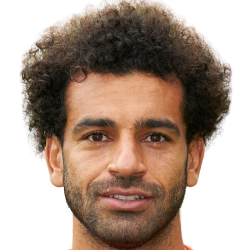

In [101]:
# Player Attributes select player index form dataset
# draw attribute details for MESSI.
player_index = 0
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(player_index, df.iloc[player_index], list(player_skills.keys()))

# draw attribute details for RONALDO.
player_index = 1
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(player_index, df.iloc[player_index], list(player_skills.keys()))

# draw attribute details for Neymar Jr
player_index = 2
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(player_index, df.iloc[player_index], list(player_skills.keys()))

# draw attribute details for M.SALAH.
player_index = 26
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(player_index, df.iloc[player_index], list(player_skills.keys()))

In [102]:
# Radar Plot for player attribute's Details
# function plot radar diagram for any player, need player skills and player name.
# noinspection PyTypeChecker
def plot_player_radar(skills, player_name):
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(r=list(skills.values()), theta=list(skills.keys()), fill='toself',
                                  name=player_name, line_color='darkviolet', ))

    fig.update_layout(polar=dict(radialaxis=dict(visible=False, range=[0, 100])), showlegend=True)
    fig.show()

In [103]:
# draw attribute Details radar chart for RONALDO.

player_index = 1
player_skills = calculate_attribute(df, player_index)
plot_player_radar(player_skills, df.iloc[player_index]["Name"])

# draw attribute Details radar chart for M.SALAH.
player_index = 26
player_skills = calculate_attribute(df, player_index)
plot_player_radar(player_skills, df.iloc[player_index]["Name"])

In [104]:
# Radar plot for player's skills.
# select player, skills columns and convert it to numeric.
player_index = 0
col = ['Crossing', 'Finishing', 'ShortPassing', 'SprintSpeed', 'Stamina', 'Strength', 'Vision', 'Acceleration',
       'BallControl']
observation = df.loc[player_index, col].astype("int64")

In [105]:
# use to concatenate skills with it's value.
categories = []
for i in col:
    categories.append(i + ": " + str(int(observation[i])) + "%")

In [106]:
# plot MESSI skills radar.
# noinspection PyRedeclaration
fig = go.Figure()
# noinspection PyTypeChecker
fig.add_trace(go.Scatterpolar(r=observation, theta=categories, fill='toself',
                              name=df.iloc[player_index]["Name"], line_color="red"))
fig.update_layout(polar=dict(radialaxis=dict(visible=False, range=[0, 100])), showlegend=True)
fig.show()

In [107]:
# Show the best squad in the world by choosing Lineup.
# player position in each line in playground.
position = {"defender": ["RB", "LB", "CB", "LCB", "RCB", "RWB", "RDM", "CDM", "LDM", "LWB"],
            "midfielder": ["RM", "LM", "CM", "LCM", "RCM", "RAM", "CAM", "LAM"],
            "attacker": ["RW", "RF", "CF", "LF", "LW", "RS", "ST", "LS"]
            }
lineup = [3, 4, 3]

In [108]:
# function that get best squad in the world based on your Lineup.
def get_best_squad(lineup):
    best_squad = df[df.Position == "GK"].sort_values("Overall", ascending=False).iloc[0:1]
    for j, k in zip(position.keys(), range(3)):
        best = []
        for i in position.get(j):
            best.append(df[df.Position == i].sort_values(["Overall", "Potential"], ascending=[False, False]).iloc[0])
        best = pd.DataFrame(best).sort_values(["Overall", "Potential"], ascending=[False, False])
        best = best.iloc[0:lineup[k]]
        best_squad = pd.concat([best_squad, best])
    return best_squad

In [109]:
# get best squad on the world based on lineup which you select.
best_squad = get_best_squad(lineup)
best_squad.reset_index(inplace=True)
player_index = list(best_squad.loc[:, ["index"]].values.reshape(11, ))
best_squad.drop("index", axis=1, inplace=True)
best_squad

ID               Name  Age  \
0   193080             De Gea   27   
1   155862       Sergio Ramos   32   
2   182493           D. Godín   32   
3   215914           N. Kanté   27   
4   192985       K. De Bruyne   27   
5   182521           T. Kroos   28   
6   194765       A. Griezmann   27   
7   231747          K. Mbappé   19   
8   158023           L. Messi   31   
9    20801  Cristiano Ronaldo   33   
10  190871          Neymar Jr   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
1   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
2   https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
3   https://cdn.sofifa.org/players/4/19/215914.png      France   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/182521.png     Germany   
6   https://cdn.sofifa.org/players/4/19/194765.png      France   
7   https://cdn.sofifa.org/players/4/19/231747.png      France   
8   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
9    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
10  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/45.png       91         93   
1   https://cdn.sofifa.org/flags/45.png       91         91   
2   https://cdn.sofifa.org/flags/60.png       90         90   
3   https://cdn.sofifa.org/flags/18.png       89         90   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5   https://cdn.sofifa.org/flags/21.png       90         90   
6   https://cdn.sofifa.org/flags/18.png       89         90   
7   https://cdn.sofifa.org/flags/18.png       88         95   
8   https://cdn.sofifa.org/flags/52.png       94         94   
9   https://cdn.sofifa.org/flags/38.png       94         94   
10  https://cdn.sofifa.org/flags/54.png       92         93   

                   Club                                     Club Logo  ...  \
0     Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
1           Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   
2       Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   
3               Chelsea    https://cdn.sofifa.org/teams/2/light/5.png  ...   
4       Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
5           Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   
6       Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   
7   Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
8          FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
9              Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
10  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   

   Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0       68.0    15.0            21.0          13.0      90.0        85.0   
1       82.0    87.0            92.0          91.0      11.0         8.0   
2       82.0    90.0            89.0          89.0       6.0         8.0   
3       85.0    90.0            91.0          85.0      15.0        12.0   
4       88.0    68.0            58.0          51.0      15.0        13.0   
5       85.0    72.0            79.0          69.0      10.0        11.0   
6       87.0    59.0            47.0          48.0      14.0         8.0   
7       86.0    34.0            34.0          32.0      13.0         5.0   
8       96.0    33.0            28.0          26.0       6.0        11.0   
9       95.0    28.0            31.0          23.0       7.0        11.0   
10      94.0    27.0            24.0          33.0       9.0         9.0   

    GKKicking GKPositioning GKReflexes Release Clause  
0        87.0          88.0       94.0        €138.6M  
1         9.0           7.0       11.0 

In [110]:
# Plot the best squad on playground based on Lineup [3,4,3].
# location of player on chart.
location_3_4_3 = {0: [150, 80],
                  1: [150, 145],
                  2: [220, 145],
                  3: [80, 145],
                  4: [60, 300],
                  5: [150, 230],
                  6: [240, 300],
                  7: [150, 320],
                  8: [60, 400],
                  9: [150, 450],
                  10: [240, 400]
                  }


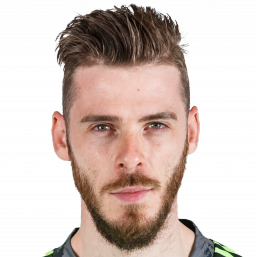
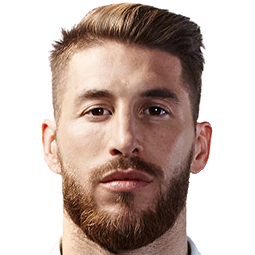
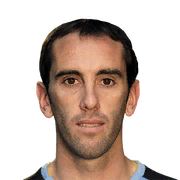
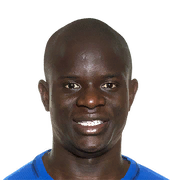
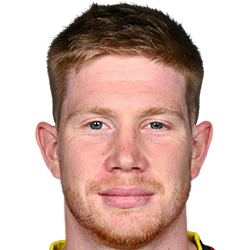
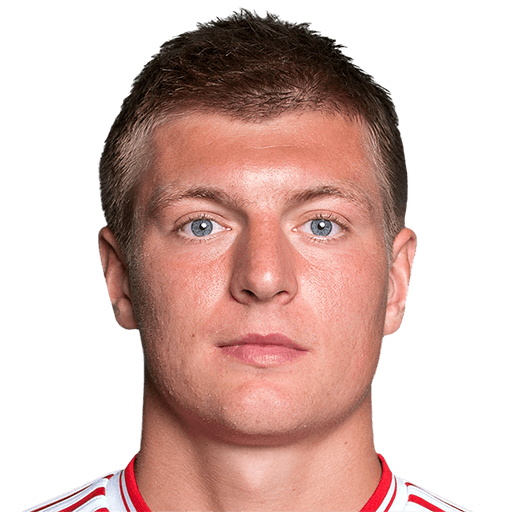
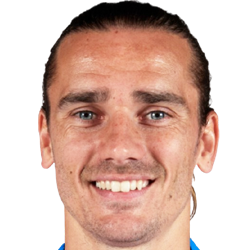
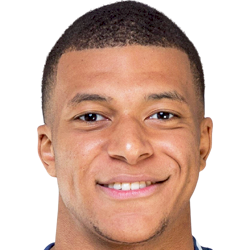
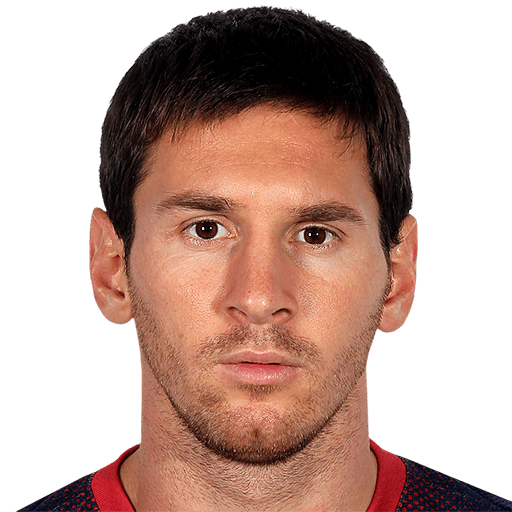
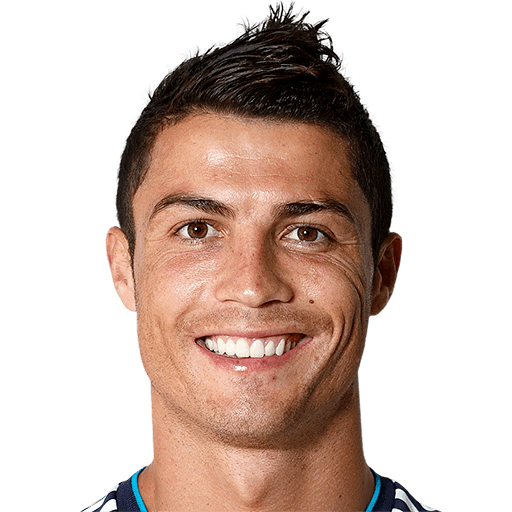
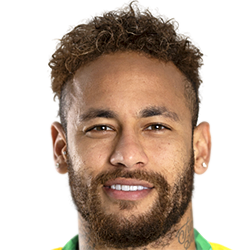
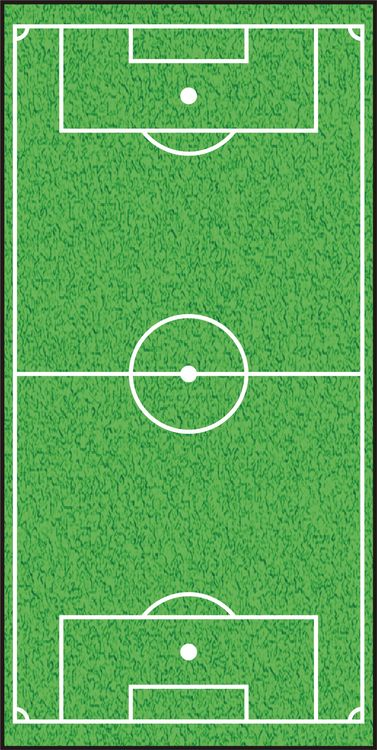

In [111]:
# Create figure
fig = go.Figure()

# Constants
img_width = 900  # 900
img_height = 1200  # 1200
scale_factor = 0.4

# add plot
# noinspection PyTypeChecker
fig.add_trace(
    go.Scatter(x=[0, img_width * scale_factor], y=[0, img_height * scale_factor], mode="markers", marker_opacity=0))

# Configure axes
fig.update_xaxes(visible=False, range=[0, img_width * scale_factor])

# disable y-axis visible
fig.update_yaxes(visible=False, range=[0, img_height * scale_factor], scaleanchor="x")

# add player image
for i in range(11):
    img = Image.open("../faces/" + str(i) + ".png")
    fig.add_layout_image(dict(x=location_3_4_3[i][0], y=location_3_4_3[i][1], sizex=60, sizey=60, xref="x",
                              yref="y", opacity=1.0, layer="above", source=img))
# Add background image
img = Image.open("../field.jpg")
fig.add_layout_image(dict(x=0, sizex=img_width * scale_factor, y=img_height * scale_factor,
                          sizey=img_height * scale_factor, xref="x", yref="y", opacity=1.0, layer="below",
                          sizing="stretch", source=img))
# Configure other layout
fig.update_layout(width=img_width * scale_factor, height=img_height * scale_factor,
                  margin={"l": 0, "r": 0, "t": 50, "b": 0},
                  title_font_size=15, title_font_family="Dosis",
                  title=({'text': "---Best Squad in The World for Lineup[3,4,3]---",
                          'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', }))
fig.show()